# Script de modélisation

## Prise en compte des données

In [1]:
import pandas as pd
import numpy as np
import panel as pn

data = pd.read_csv('pricing_requests_new.csv')
data.head()

,order_requests,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,1,834,91,0,copenhagen,2,hungarian,0,6048,Yin Yang,8 Premium,0,0,0
1,1,757,151,1,copenhagen,2,hungarian,0,6048,Accar Hotels,Navatel,1,0,0
2,1,893,229,0,copenhagen,2,hungarian,0,6048,Morriott International,Morriot,1,1,0
3,1,989,108,0,copenhagen,2,hungarian,0,6048,Accar Hotels,Ibas,0,0,0
4,1,32,175,0,copenhagen,2,hungarian,0,6048,Morriott International,CourtYord,0,0,0


In [2]:
len(data)

54322

In [3]:
data.dtypes

order_requests      int64
hotel_id            int64
price               int64
stock               int64
city               object
date                int64
language           object
mobile              int64
avatar_id           int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [4]:
#On affecte le bon type aux variables qualitatives
data["city"]=pd.Categorical(data["city"],ordered=False)
data["language"]=pd.Categorical(data["language"],ordered=False)
data["group"]=pd.Categorical(data["group"],ordered=False)
data["brand"]=pd.Categorical(data["brand"],ordered=False)

data["mobile"]=pd.Categorical(data["mobile"],ordered=False)
data["parking"]=pd.Categorical(data["parking"],ordered=False)
data["pool"]=pd.Categorical(data["pool"],ordered=False)
data["children_policy"]=pd.Categorical(data["children_policy"],ordered=False)

data["hotel_id"]=pd.Categorical(data["hotel_id"],ordered=False)
data["avatar_id"]=pd.Categorical(data["avatar_id"],ordered=False)

data["price"]=pd.DataFrame(data["price"], dtype=float)

data.dtypes
#data.head()

order_requests        int64
hotel_id           category
price               float64
stock                 int64
city               category
date                  int64
language           category
mobile             category
avatar_id          category
group              category
brand              category
parking            category
pool               category
children_policy    category
dtype: object

## Analyse de données

In [5]:
data.describe() #Indicateurs statistiques 1D pour les variables quantitatives

,order_requests,price,stock,date
count,54322.000000,54322.000000,54322.000000,54322.000000
mean,252.958010,152.491937,43.830198,21.769357
std,144.489733,76.104265,51.255468,12.645679
min,1.000000,39.000000,0.000000,0.000000
25%,133.000000,94.000000,6.000000,10.000000
50%,256.000000,137.000000,24.000000,22.000000
75%,377.000000,189.000000,64.000000,32.000000
max,507.000000,522.000000,269.000000,43.000000


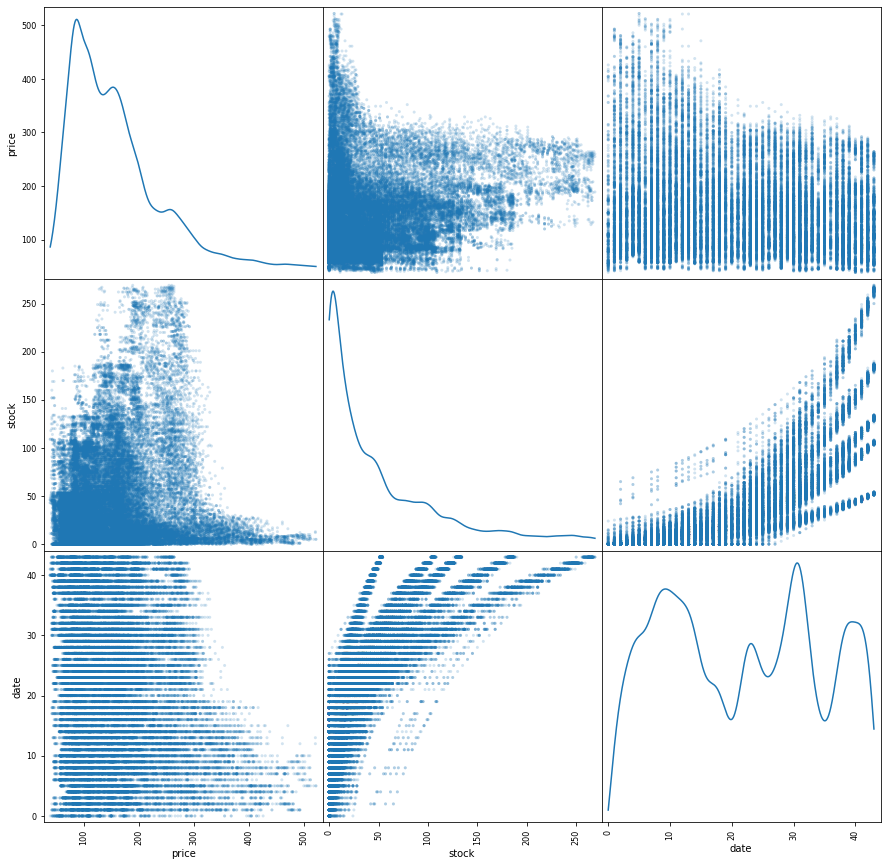

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
scatter_matrix(data[["price","stock","date"]], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

### Observations :

Ligne 1 :

prix en fonction du stock : prix + élevé quand stock tout petit. Passé un stock de 50 chambres dispo, peu de variation du prix. corrélation = 0.2 environ

prix en fonction de la date : prix + élevé quand date + petite. Passé 20 jours, peu de variation du prix. corrélation = -0.2 environ

Ligne 2 :

stock en fonction de la date : stock augmente avec la date. corrélation = 0.8 environ

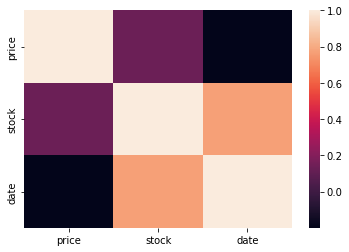

In [7]:
correlation_mat = data[["price","stock","date"]].corr()

import seaborn as sns
sns.heatmap(correlation_mat, annot = False)

plt.show()

### Analyse à ajouter pour déterminer les features les + importantes, etc...

Analyse factorielle discriminante ?

## Extraction de l'échantillon d'apprentissage

In [8]:
data.head()

,order_requests,hotel_id,price,stock,city,date,language,mobile,avatar_id,group,brand,parking,pool,children_policy
0,1,834,91.0,0,copenhagen,2,hungarian,0,6048,Yin Yang,8 Premium,0,0,0
1,1,757,151.0,1,copenhagen,2,hungarian,0,6048,Accar Hotels,Navatel,1,0,0
2,1,893,229.0,0,copenhagen,2,hungarian,0,6048,Morriott International,Morriot,1,1,0
3,1,989,108.0,0,copenhagen,2,hungarian,0,6048,Accar Hotels,Ibas,0,0,0
4,1,32,175.0,0,copenhagen,2,hungarian,0,6048,Morriott International,CourtYord,0,0,0


### Xtrain avec conversion des variables catégorielles en dummy/indicator variables

+ ajouter les caractéristiques des hôtels ds les inputs?
+ ATTENTION à ordonner de la même façon pour Xtest
+ une étape de normalisation en + pour les inputs quantitatifs?

In [9]:
dataQuant = data[["stock","date"]]
dataDum = pd.get_dummies(data[["city","language","mobile","avatar_id","hotel_id"]])
Xtrain = pd.concat([dataDum,dataQuant],axis=1)
Xtrain.head()

,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,city_vienna,city_vilnius,language_austrian,...,hotel_id_991,hotel_id_992,hotel_id_993,hotel_id_994,hotel_id_995,hotel_id_996,hotel_id_997,hotel_id_998,stock,date
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [10]:
Ytrain = data[["price"]]
Ytrain.head()

,price
0,91.0
1,151.0
2,229.0
3,108.0
4,175.0


In [11]:
len(Xtrain)

54322

In [12]:
len(Ytrain)

54322

In [22]:
Y = np.ravel(Ytrain)
Y

array([ 91., 151., 229., ...,  93.,  74., 131.])

## Modélisation avec une forêt aléatoire

In [20]:
#help(RandomForestRegressor)
#help(forest.fit)

Premier modèle avec 100 arbres dans la forêt et 2 variables tirées aléatoirement lors de la construction de chq noeud.

In [24]:
from sklearn.ensemble import RandomForestRegressor
# définition des paramètres
forest = RandomForestRegressor(n_estimators=100, 
   criterion='mse', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xtrain,Y)
print(rfFit.oob_score_) #proportion de bonnes prédictions avec l'échantillon train

0.9617145359022533


Optimisation par validation croisée du nombre d'arbres dans la forêts et du nombre de variables tirées aléatoirement lors de la construction de chaque noeud. PLUS TARD

In [ ]:
#param=[{"n_estimators":list(range(100,500,100)),"max_features":list(range(2,10,1))}]
#rf= GridSearchCV(RandomForestRegressor(),
#        param,cv=10,n_jobs=-1)
#rfOpt=rf.fit(Xr_train, Yr_train)
# paramètre optimal
#print("Meilleur score = %f, Meilleur paramètre = %s" % (rfOpt.best_score_,rfOpt.best_params_))

## Prédiction sur les données test

In [26]:
test = pd.read_csv('./defi-ia-2023/test_set.csv')
test.head()

,index,order_requests,city,date,language,mobile,avatar_id,hotel_id,stock
0,0,1,vilnius,21,romanian,0,1,161,46
1,1,1,vilnius,21,romanian,0,1,187,32
2,2,1,vilnius,21,romanian,0,1,279,12
3,3,1,vilnius,21,romanian,0,1,395,10
4,4,1,vilnius,21,romanian,0,1,488,42


In [27]:
len(test)

6644

In [28]:
test.dtypes

index              int64
order_requests     int64
city              object
date               int64
language          object
mobile             int64
avatar_id          int64
hotel_id           int64
stock              int64
dtype: object

In [30]:
#On affecte le bon type aux variables qualitatives
test["city"]=pd.Categorical(test["city"],ordered=False)
test["language"]=pd.Categorical(test["language"],ordered=False)
#test["group"]=pd.Categorical(test["group"],ordered=False)
#test["brand"]=pd.Categorical(test["brand"],ordered=False)

test["mobile"]=pd.Categorical(test["mobile"],ordered=False)
#test["parking"]=pd.Categorical(test["parking"],ordered=False)
#test["pool"]=pd.Categorical(test["pool"],ordered=False)
#test["children_policy"]=pd.Categorical(test["children_policy"],ordered=False)

test["hotel_id"]=pd.Categorical(test["hotel_id"],ordered=False)
test["avatar_id"]=pd.Categorical(test["avatar_id"],ordered=False)

#test["price"]=pd.DataFrame(test["price"], dtype=float)

test.dtypes
#test.head()

index                int64
order_requests       int64
city              category
date                 int64
language          category
mobile            category
avatar_id         category
hotel_id          category
stock                int64
dtype: object

In [31]:
testQuant = test[["stock","date"]]
testDum = pd.get_dummies(test[["city","language","mobile","avatar_id","hotel_id"]])
Xtest = pd.concat([testDum,testQuant],axis=1)
Xtest.head()

,city_amsterdam,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,city_vienna,city_vilnius,language_austrian,...,hotel_id_957,hotel_id_962,hotel_id_966,hotel_id_974,hotel_id_981,hotel_id_987,hotel_id_992,hotel_id_995,stock,date
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,46,21
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,32,21
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,12,21
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,10,21
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,42,21


In [32]:
Ypred=rfFit.predict(Xtest)

ValueError: X has 1010 features, but DecisionTreeRegressor is expecting 1105 features as input.